In [2]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from analyze_src.multivariate_analysis import SimpleMultivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [6]:

data_path = r"C:\Users\venka\PycharmProjects\Churn_analysis\Data\customer_churn_data.csv"
df = pd.read_csv(data_path)

In [8]:
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB
None


In [9]:
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
        CustomerID          Age      Tenure  MonthlyCharges  TotalCharges
count  1000.000000  1000.000000  1000.00000     1000.000000   1000.000000
mean    500.500000    44.674000    18.97300       74.391290   1404.364060
std     288.819436     9.797741    18.89257       25.712083   1571.755048
min       1.000000    12.000000     0.00000       30.000000      0.000000
25%     250.750000    38.000000     5.00000       52.357500    345.217500
50%     500.500000    45.000000    13.00000       74.060000    872.870000
75%     750.250000    51.000000    26.00000       96.102500   1900.175000
max    1000.000000    83.000000   122.00000      119.960000  12416.250000

Summary Statistics (Categorical Features):
        Gender    ContractType InternetService TechSupport Churn
count     1000            1000             703        1000  1000
unique       2               3               2           2     2
top     Female  Month-to-Month     Fiber Optic       


Missing Values Count by Column:
InternetService    297
dtype: int64

Visualizing Missing Values...


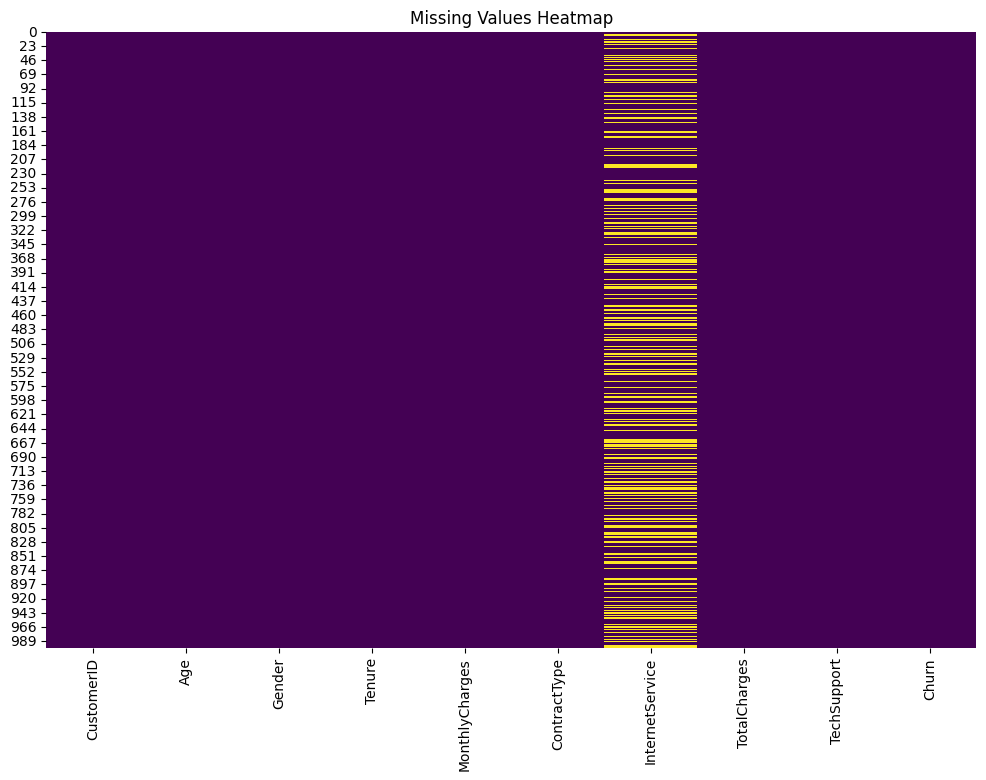

In [10]:
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

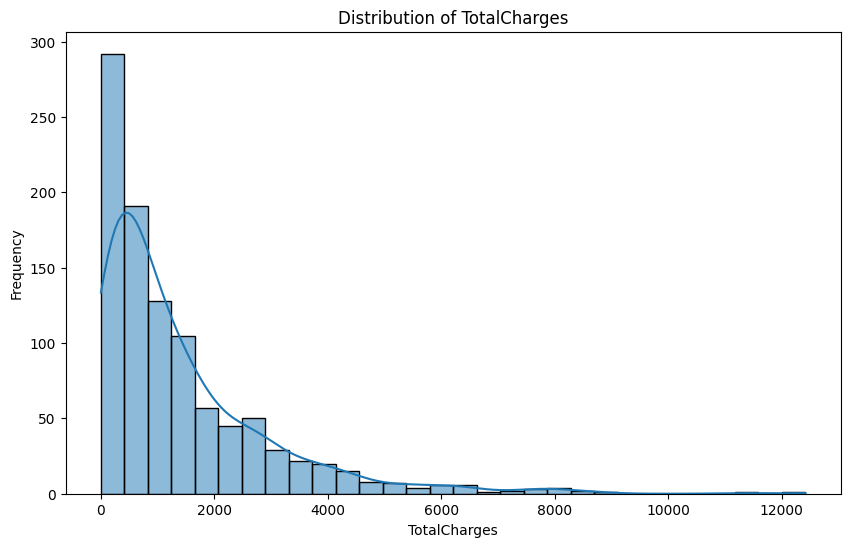

In [11]:
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'TotalCharges')

In [12]:
df.isna().sum()


CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [13]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [14]:
df["InternetService"]= df["InternetService"].fillna("")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  1000 non-null   object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [16]:
df.duplicated().sum()

0

In [22]:
numeric_columns = df.select_dtypes(include=["number"])

In [24]:
numeric_columns.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


<Axes: ylabel='count'>

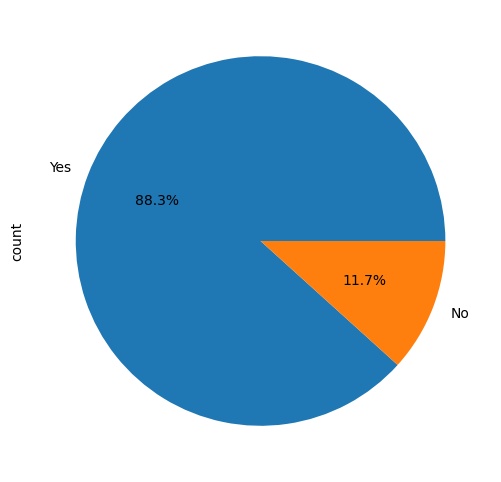

In [26]:
df["Churn"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(8, 6))

In [27]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [29]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [30]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [31]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

<Axes: xlabel='ContractType'>

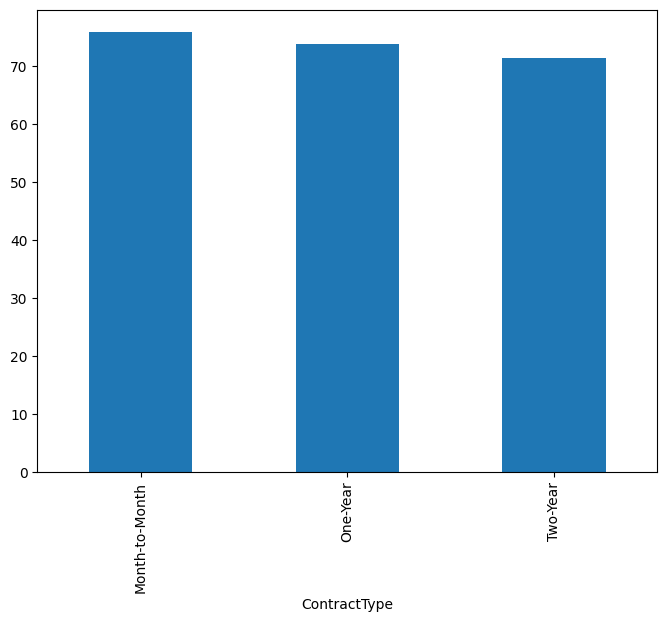

In [33]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar", figsize=(8, 6))

(array([33., 38., 34., 29., 33., 32., 38., 33., 34., 34., 36., 38., 38.,
        29., 26., 23., 34., 47., 33., 38., 43., 25., 33., 23., 48., 30.,
        30., 28., 26., 34.]),
 array([ 30.        ,  32.99866667,  35.99733333,  38.996     ,
         41.99466667,  44.99333333,  47.992     ,  50.99066667,
         53.98933333,  56.988     ,  59.98666667,  62.98533333,
         65.984     ,  68.98266667,  71.98133333,  74.98      ,
         77.97866667,  80.97733333,  83.976     ,  86.97466667,
         89.97333333,  92.972     ,  95.97066667,  98.96933333,
        101.968     , 104.96666667, 107.96533333, 110.964     ,
        113.96266667, 116.96133333, 119.96      ]),
 <BarContainer object of 30 artists>)

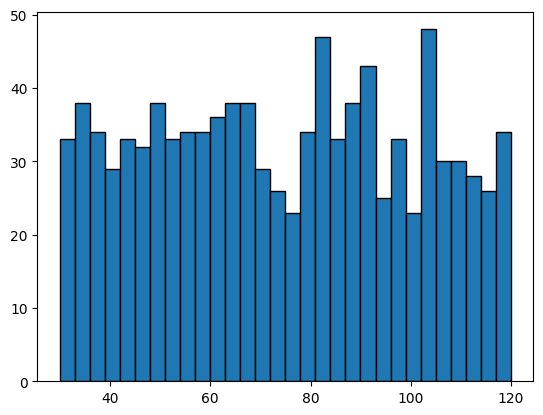

In [35]:
plt.hist(df["MonthlyCharges"], bins=30, edgecolor='black')

(array([217., 150., 123.,  87.,  76.,  70.,  51.,  45.,  31.,  26.,  24.,
         14.,  13.,   7.,  16.,  15.,  11.,   4.,   5.,   6.,   2.,   1.,
          0.,   1.,   3.,   1.,   0.,   0.,   0.,   1.]),
 array([  0.        ,   4.06666667,   8.13333333,  12.2       ,
         16.26666667,  20.33333333,  24.4       ,  28.46666667,
         32.53333333,  36.6       ,  40.66666667,  44.73333333,
         48.8       ,  52.86666667,  56.93333333,  61.        ,
         65.06666667,  69.13333333,  73.2       ,  77.26666667,
         81.33333333,  85.4       ,  89.46666667,  93.53333333,
         97.6       , 101.66666667, 105.73333333, 109.8       ,
        113.86666667, 117.93333333, 122.        ]),
 <BarContainer object of 30 artists>)

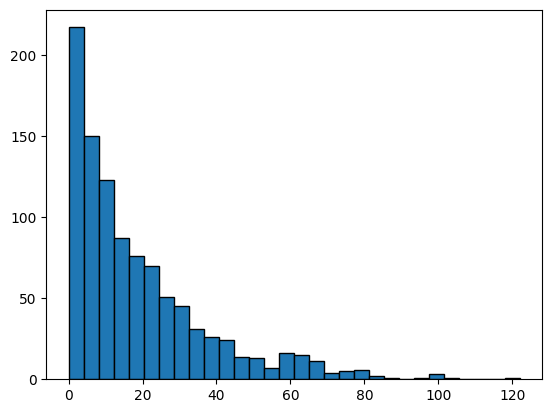

In [36]:
plt.hist(df["Tenure"], bins=30, edgecolor='black')

In [37]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [88]:
n=df[["Churn"]]
x=df[["MonthlyCharges","Tenure","Age","Gender"]]

In [89]:
x

,MonthlyCharges,Tenure,Age,Gender
0,88.35,4,49,Male
1,36.67,0,43,Male
2,63.79,2,51,Female
3,102.34,8,60,Female
4,69.01,32,42,Male
...,...,...,...,...
995,37.14,41,42,Male
996,80.93,9,62,Male
997,111.72,15,51,Female
998,65.67,68,39,Male


In [90]:
x["Gender"]=x["Gender"].apply(lambda x: 1 if x=="Female" else 0)

C:\Users\venka\AppData\Local\Temp\ipykernel_4008\2134273447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Gender"]=x["Gender"].apply(lambda x: 1 if x=="Female" else 0)


In [92]:
n

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [59]:
x

,MonthlyCharges,Tenure,Age,Gender
0,88.35,4,49,0
1,36.67,0,43,0
2,63.79,2,51,1
3,102.34,8,60,1
4,69.01,32,42,0
...,...,...,...,...
995,37.14,41,42,0
996,80.93,9,62,0
997,111.72,15,51,1
998,65.67,68,39,0


In [93]:
n["Churn"]=n["Churn"].apply(lambda x: 1 if x=="Yes" else 0)

C:\Users\venka\AppData\Local\Temp\ipykernel_4008\2015638794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n["Churn"]=n["Churn"].apply(lambda x: 1 if x=="Yes" else 0)


In [94]:
n

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, n, test_size=0.2, random_state=42)

In [96]:
x

,MonthlyCharges,Tenure,Age,Gender
0,88.35,4,49,0
1,36.67,0,43,0
2,63.79,2,51,1
3,102.34,8,60,1
4,69.01,32,42,0
...,...,...,...,...
995,37.14,41,42,0
996,80.93,9,62,0
997,111.72,15,51,1
998,65.67,68,39,0


In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler=StandardScaler()
x_train= scaler.fit_transform(x_train)

In [99]:
x_train

array([[ 0.92037124,  2.28080878, -0.27936177, -1.06725697],
       [ 1.12221019,  0.11295321,  0.02664838,  0.93698147],
       [-1.00540975,  0.69457299, -0.38136516, -1.06725697],
       ...,
       [ 0.16723494,  1.91068709,  0.23065515, -1.06725697],
       [ 1.6909211 , -0.36291753,  0.02664838,  0.93698147],
       [-0.87045469,  0.06007868, -0.38136516,  0.93698147]])

In [100]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [101]:
y_train

,Churn
29,0
535,1
695,0
557,1
836,1
...,...
106,1
270,1
860,1
435,1


In [102]:
scaled_x_test= scaler.fit_transform(x_test)

In [103]:
x_train.shape

(800, 4)

In [104]:
scaled_x_test.shape

(200, 4)

In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [107]:
logmodel = LogisticRegression()

In [108]:
logmodel.fit(x_train, y_train)

C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [112]:
y_pred=logmodel.predict(scaled_x_test)

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.04      0.08        23
           1       0.89      0.99      0.94       177

    accuracy                           0.89       200
   macro avg       0.69      0.52      0.51       200
weighted avg       0.84      0.89      0.84       200



In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
params_grid={
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

In [116]:
gridknn = GridSearchCV(KNeighborsClassifier(), params_grid, cv=5)

In [117]:
gridknn.fit(x_train, y_train)

C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [118]:
gridknn.best_params_

{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}

In [124]:
y_pred1_knn = gridknn.predict(scaled_x_test)

In [125]:
print(classification_report(y_test, y_pred1_knn))

              precision    recall  f1-score   support

           0       0.33      0.04      0.08        23
           1       0.89      0.99      0.94       177

    accuracy                           0.88       200
   macro avg       0.61      0.52      0.51       200
weighted avg       0.82      0.88      0.84       200



In [126]:
from sklearn.svm import SVC

In [127]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

In [128]:
grid_search = GridSearchCV(estimator=SVC(), 
                           param_grid=param_grid_svm, 
                           refit=True, 
                           verbose=2, 
                           cv=5)

In [129]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [130]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto

C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was pass

[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...................

C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was pass

[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................

C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was pass

[CV] END .....................C=100, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......................C=100, gamma=auto, kernel=rbf; total time=   0.0s


C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was pass

[CV] END ......................C=100, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...................C=100, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=100, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=100, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=100, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=100, gamma=auto, kernel=linear; total time=   0.0s


C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was pass

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [131]:
grid_search.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

In [132]:
y_pred1_svc = gridknn.predict(scaled_x_test)

In [133]:
print(classification_report(y_test, y_pred1_svc))

              precision    recall  f1-score   support

           0       0.33      0.04      0.08        23
           1       0.89      0.99      0.94       177

    accuracy                           0.88       200
   macro avg       0.61      0.52      0.51       200
weighted avg       0.82      0.88      0.84       200



In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [136]:
grid_search_DT = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                           param_grid=param_grid_decision_tree, 
                           refit=True, 
                           verbose=2, 
                           cv=5)

In [137]:
grid_search_DT.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [138]:
grid_search_DT.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [141]:
y_pred2= grid_search_DT.predict(scaled_x_test)

In [142]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.24      0.17      0.20        23
           1       0.90      0.93      0.91       177

    accuracy                           0.84       200
   macro avg       0.57      0.55      0.56       200
weighted avg       0.82      0.84      0.83       200



In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
param_grid_random_forest = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [146]:
grid_search_RF= GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid_random_forest, 
                           refit=True, 
                           verbose=2, 
                           cv=5,
                           n_jobs=-1)

In [147]:
grid_search_RF.fit(x_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [148]:
grid_search_RF.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300}

In [149]:
y_pred3= grid_search_RF.predict(scaled_x_test)

In [150]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.33      0.04      0.08        23
           1       0.89      0.99      0.94       177

    accuracy                           0.88       200
   macro avg       0.61      0.52      0.51       200
weighted avg       0.82      0.88      0.84       200



In [151]:
joblib.dump(grid_search_RF, "random_forest_model.pkl")

['random_forest_model.pkl']

In [152]:
x.columns

Index(['MonthlyCharges', 'Tenure', 'Age', 'Gender'], dtype='object')